Best Route: [1, 0, 8, 5, 4, 3, 9, 7, 2, 6]
Shortest Distance: 251


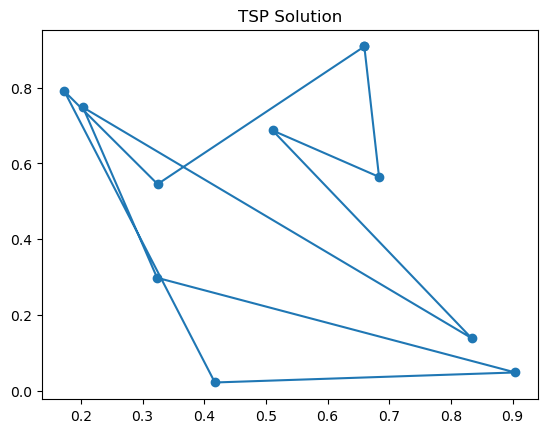

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Distance matrix for 10 cities
distances = np.array([
    [0, 29, 20, 21, 16, 31, 100, 12, 4, 31],
    [29, 0, 15, 29, 28, 40, 72, 21, 29, 41],
    [20, 15, 0, 15, 14, 25, 81, 9, 23, 27],
    [21, 29, 15, 0, 4, 12, 92, 12, 25, 13],
    [16, 28, 14, 4, 0, 16, 94, 9, 20, 16],
    [31, 40, 25, 12, 16, 0, 98, 15, 14, 23],
    [100, 72, 81, 92, 94, 98, 0, 90, 101, 99],
    [12, 21, 9, 12, 9, 15, 90, 0, 11, 9],
    [4, 29, 23, 25, 20, 14, 101, 11, 0, 22],
    [31, 41, 27, 13, 16, 23, 99, 9, 22, 0],
])

# Parameters
POP_SIZE = 100
GENS = 500
MUTATION_RATE = 0.1

def create_population(size, num_cities):
    return [random.sample(range(num_cities), num_cities) for _ in range(size)]

def fitness(route):
    return sum(distances[route[i], route[i+1]] for i in range(len(route) - 1)) + distances[route[-1], route[0]]

def select_parents(population):
    fitnesses = [1 / fitness(ind) for ind in population]
    probabilities = fitnesses / np.sum(fitnesses)
    parents = random.choices(population, probabilities, k=2)
    return parents

def crossover(parent1, parent2):
    size = len(parent1)
    start, end = sorted(random.sample(range(size), 2))
    child = [None] * size
    child[start:end] = parent1[start:end]
    pointer = 0
    for city in parent2:
        if city not in child:
            while child[pointer] is not None:
                pointer += 1
            child[pointer] = city
    return child

def mutate(route):
    if random.random() < MUTATION_RATE:
        i, j = random.sample(range(len(route)), 2)
        route[i], route[j] = route[j], route[i]

def genetic_algorithm():
    population = create_population(POP_SIZE, len(distances))
    best_route = min(population, key=fitness)
    best_fitness = fitness(best_route)

    for _ in range(GENS):
        new_population = []
        for _ in range(POP_SIZE):
            parent1, parent2 = select_parents(population)
            child = crossover(parent1, parent2)
            mutate(child)
            new_population.append(child)

        population = new_population
        current_best = min(population, key=fitness)
        current_fitness = fitness(current_best)

        if current_fitness < best_fitness:
            best_route, best_fitness = current_best, current_fitness

    return best_route, best_fitness

# Run the GA
best_route, best_distance = genetic_algorithm()
print("Best Route:", best_route)
print("Shortest Distance:", best_distance)

# Visualization
city_coords = np.random.rand(10, 2)  # Simulate city coordinates for visualization
route_coords = np.array([city_coords[city] for city in best_route] + [city_coords[best_route[0]]])
plt.plot(route_coords[:, 0], route_coords[:, 1], marker='o')
plt.title("TSP Solution")
plt.show()
